In [784]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [785]:
"""
df = pd.read_csv("data/20200325_counsel_chat.csv", encoding='utf-8')
df.drop(columns=["Unnamed: 0", 'questionID', "questionTitle","questionText", 'questionLink',"therapistInfo", "therapistURL", "views", "upvotes"], inplace=True)
df.columns = ["topic", "answer", "split"]
df.head()
"""

'\ndf = pd.read_csv("data/20200325_counsel_chat.csv", encoding=\'utf-8\')\ndf.drop(columns=["Unnamed: 0", \'questionID\', "questionTitle","questionText", \'questionLink\',"therapistInfo", "therapistURL", "views", "upvotes"], inplace=True)\ndf.columns = ["topic", "answer", "split"]\ndf.head()\n'

Guardamos el csv para trabajar sobre este

In [786]:
#df.to_csv('data/counsel-chat.csv')

A partir de este csv

In [787]:
df = pd.read_csv("data/counsel-chat.csv", encoding='utf-8')
df.drop(columns="Unnamed: 0", inplace=True)
df.head()

,topic,answer,split
0,depression,"If everyone thinks you're worthless, then mayb...",train
1,depression,"Hello, and thank you for your question and see...",train
2,depression,First thing I'd suggest is getting the sleep y...,train
3,depression,Therapy is essential for those that are feelin...,train
4,depression,I first want to let you know that you are not ...,train


### Estudio topics más importantes

##### Listado de topics ordenados por número de respuestas

In [788]:
listado_topics = df.groupby(["topic"]).size()
listado_topics.sort_values(ascending = False, inplace=True)
listado_topics

topic
depression                  330
anxiety                     249
counseling-fundamentals     240
intimacy                    205
relationships               174
parenting                   145
family-conflict             116
self-esteem                  83
relationship-dissolution     76
trauma                       66
behavioral-change            51
marriage                     46
anger-management             38
lgbtq                        38
substance-abuse              35
spirituality                 34
professional-ethics          32
workplace-relationships      26
diagnosis                    22
domestic-violence            21
social-relationships         20
grief-and-loss               18
self-harm                    11
eating-disorders             10
sleep-improvement            10
legal-regulatory              8
stress                        7
children-adolescents          6
addiction                     5
human-sexuality               4
military-issues               3
dt

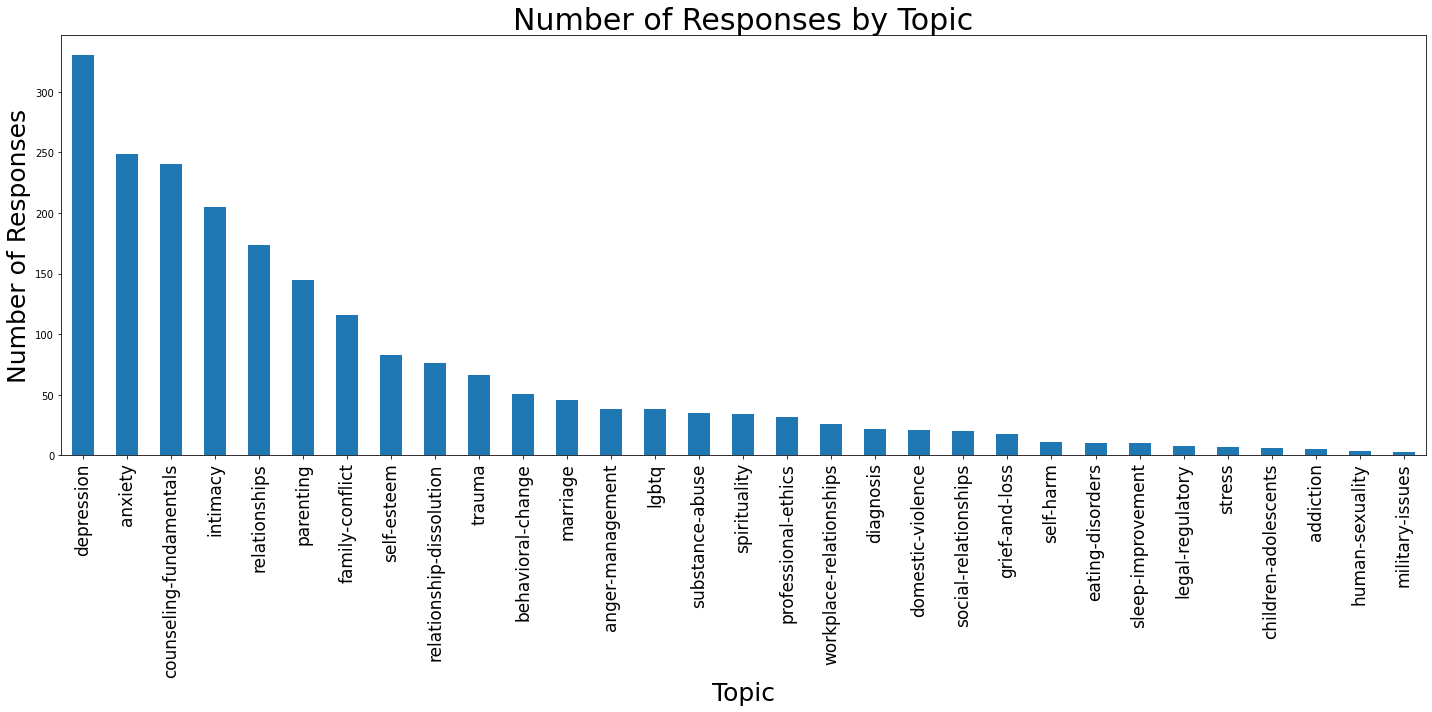

In [789]:
#Plot
fig, ax = plt.subplots(figsize=(20, 10))
listado_topics.plot.bar(ax=ax)
ax.set_title("Number of Responses by Topic", fontsize=30)
ax.set_xlabel("Topic", fontsize=25)
ax.set_ylabel("Number of Responses", fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
plt.tight_layout()

### Simplificación del dataset eliminando y siplificando topics

##### Eliminación de los topics con menos respuestas o menos importantes

Localizamos los topics y los añadimos a un array

In [790]:
innecesary_topics = ["military-issues","human-sexuality","children-adolescents",
                     "legal-regulatory","sleep-improvement","eating-disorders",
                     "grief-and-loss","social-relationships","diagnosis",
                     "workplace-relationships","professional-ethics","professional-ethics",
                     "lgbtq"]
#df.loc[(df['topic'] == innecesary_topics[3])].index

Eliminamos los topics

In [791]:
count = 0
for i in innecesary_topics:
    df.drop(df.loc[(df['topic'] == innecesary_topics[count])].index, inplace = True)
    #df.loc[(df['topic'] == innecesary_topics[])]
    count=count + 1

##### Unión de topics

Substance abuse --> addiction

In [792]:
df.loc[df['topic'] == 'substance-abuse', 'topic'] = 'addiction'

In [793]:
listado_topics = df.groupby(["topic"]).size()
listado_topics.sort_values(ascending = False, inplace=True)
listado_topics

topic
depression                  330
anxiety                     249
counseling-fundamentals     240
intimacy                    205
relationships               174
parenting                   145
family-conflict             116
self-esteem                  83
relationship-dissolution     76
trauma                       66
behavioral-change            51
marriage                     46
addiction                    40
anger-management             38
spirituality                 34
domestic-violence            21
self-harm                    11
stress                        7
dtype: int64

##### Aumentando el dataset

Para ello vamos a añadir respuestas a topics con pocas respuestas

In [794]:
topics_incompletos = ["addiction", "stress", "self-harm", "domestic-violence"]

In [795]:
#Resetear dataset para evitar duplicador
#Hacer cada vez que se ejecute el siguiente bloque, eliminar cuando se termine para que se cambien los topics eliminados y unidos
#df = pd.read_csv("data/counsel-chat.csv", encoding='utf-8')

1.- Una vez creado el txt de cada topic a aumentar vamos a leerlo y guardar las frases en un array

2.- Leemos el array mientras añadimos las erespuestas en el csv

In [796]:
for i in topics_incompletos:
    #1.-
    respuestas=[]
    with open("data/"+i+".txt") as archivo:
        respuestas = archivo.readlines()
    #2.-
    #Estructura del dataframe:
    #question, topic, answer, split
    for answer in respuestas:
        topic_list = {'topic' : i, 'answer' : answer, "split" : "train"}
        df = df.append(topic_list, ignore_index=True)

In [797]:
listado_topics = df.groupby(["topic"]).size()
listado_topics.sort_values(ascending = False, inplace=True)
listado_topics


topic
depression                  330
anxiety                     249
counseling-fundamentals     240
intimacy                    205
relationships               174
parenting                   145
family-conflict             116
self-esteem                  83
relationship-dissolution     76
trauma                       66
behavioral-change            51
addiction                    49
marriage                     46
domestic-violence            39
anger-management             38
spirituality                 34
self-harm                    26
stress                       26
dtype: int64

In [798]:
df.to_csv('data/model-counsel-chat.csv')

##### Separando los conjuntos de train, test y validation

In [803]:
conjunto_test = df.loc[(df['split'] == "test")]
conjunto_train = df.loc[(df['split'] == "train")]
conjunto_val = df.loc[(df['split'] == "val")]